In [1]:
from qiskit import IBMQ
import qiskit
qiskit.__qiskit_version__

/Users/revilooliver/Documents/quantum_computing/anaconda/anaconda3/envs/qiskit-terra/lib/python3.7/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


{'qiskit-terra': '0.18.3', 'qiskit-aer': '0.9.1', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.18.1', 'qiskit-aqua': '0.9.5', 'qiskit': '0.32.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [2]:
import math
import numpy as np
import random
import re
import qiskit.tools.jupyter
import cirq

from qiskit import *
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

from qiskit.transpiler import PassManager
from qiskit.transpiler import CouplingMap, Layout
from qiskit.transpiler.passes import StochasticSwap, BasicSwap
from gate_variants.toffoli_variants import CCX_Variant_Gate 
from qiskit.circuit.library.standard_gates.x import XGate, CXGate
from qiskit.circuit.library.standard_gates.h import HGate
from qiskit.circuit.library.standard_gates.t import TGate, TdgGate
from qiskit.test.mock import FakeManhattan
from qiskit.test.mock import FakeBogota
from qiskit.test.mock import FakeMumbai
from qiskit.test.mock import FakeTokyo

from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
%matplotlib inline

from qiskit.providers.aer import AerSimulator

In [3]:
IBMQ.stored_account()

{'token': '2916c8f35261ae6714a1a3a0be3f95ce6f350a68307bfd3a12bb007ffa6dfac17a11d72b46e629512f960313e26f81dd2761912721c64797229a9d74048b4cd7',
 'url': 'https://auth.quantum-computing.ibm.com/api'}

In [4]:
#IBMQ.enable_account(token,url)

In [5]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='anl', project='csc430')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_montreal') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_toronto') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_mumbai') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_guadalupe') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430'

In [6]:
import cirq
q0 = cirq.LineQubit(0)
q1 = cirq.LineQubit(1)
q2 = cirq.LineQubit(2)

In [7]:
cx_original = cirq.Circuit(
    #cirq.Moment(cirq.I(q0), cirq.I(q1), cirq.I(q2))
    cirq.Moment(cirq.CNOT(q0, q1), cirq.I(q2)),
    #cirq.Moment(cirq.TOFFOLI(q0, q1, q2)),
)

In [8]:
cirq.unitary(cx_original)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])

In [9]:
cx02_original = cirq.Circuit(
    #cirq.Moment(cirq.I(q0), cirq.I(q1), cirq.I(q2))
    cirq.Moment(cirq.CNOT(q0, q2), cirq.I(q1)),
    #cirq.Moment(cirq.TOFFOLI(q0, q1, q2)),
)

In [10]:
cirq.unitary(cx02_original)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

In [11]:
cx12_original = cirq.Circuit(
    #cirq.Moment(cirq.I(q0), cirq.I(q1), cirq.I(q2))
    cirq.Moment(cirq.CNOT(q1, q2), cirq.I(q0)),
    #cirq.Moment(cirq.TOFFOLI(q0, q1, q2)),
)

In [12]:
cirq.unitary(cx12_original)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

In [13]:
ccx_circ = QuantumCircuit(3)
ccx_circ.ccx(0,1,2)
ccx_circ.save_unitary()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
ccx_circ = transpile(ccx_circ, simulator)

# Run and get unitary
ccx_result = simulator.run(ccx_circ).result()
ccx_unitary = ccx_result.get_unitary(ccx_circ)

In [14]:
circ = QuantumCircuit(3)
circ.append(CCX_Variant_Gate(variant_tag=('20','01','f','p')),[0,1,2])
circ.save_unitary()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get unitary
result = simulator.run(circ).result()
unitary = result.get_unitary(circ)

initialized variant_tag: ('20', '01', 'f', 'p')
look for variant_rules ('20', '01', 'f', 'p')


In [15]:
        q = [0,1,2]
        variant_rules = {
            ('01', '01', 'f', 's'): [
                (HGate(), [q[2]], []),
                (TGate(), [q[1]], []),
                (TGate(), [q[0]], []),
                (TGate(), [q[2]], []),
                (CXGate(), [q[0], q[1]], []),
                (CXGate(), [q[2], q[0]], []),
                (CXGate(), [q[1], q[2]], []),
                (TdgGate(), [q[0]], []),
                (CXGate(), [q[1], q[0]], []),
                (TdgGate(), [q[1]], []),
                (TdgGate(), [q[0]], []),
                (TGate(), [q[2]], []),
                (CXGate(), [q[2], q[0]], []),
                (CXGate(), [q[1], q[2]], []),
                (CXGate(), [q[0], q[1]], []),
                (HGate(), [q[2]], []),
            ],
            ('10', '10', 'f', 's'): [
                (HGate(), [q[2]], []),
                (TGate(), [q[0]], []),
                (TGate(), [q[1]], []),
                (TGate(), [q[2]], []),
                (CXGate(), [q[1], q[0]], []),
                (CXGate(), [q[2], q[1]], []),
                (CXGate(), [q[0], q[2]], []),
                (TdgGate(), [q[1]], []),
                (CXGate(), [q[0], q[1]], []),
                (TdgGate(), [q[0]], []),
                (TdgGate(), [q[1]], []),
                (TGate(), [q[2]], []),
                (CXGate(), [q[2], q[1]], []),
                (CXGate(), [q[0], q[2]], []),
                (CXGate(), [q[1], q[0]], []),
                (HGate(), [q[2]], []),
            ],
            ('10', '10', 'f', 'p'): [
                (HGate(), [q[2]], []),
                (CXGate(), [q[1], q[0]], []),
                (CXGate(), [q[0], q[2]], []),
                (CXGate(), [q[2], q[1]], []),
                (TdgGate(), [q[2]], []),
                (TGate(), [q[1]], []),
                (TGate(), [q[0]], []),
                (CXGate(), [q[0], q[1]], []),
                (TGate(), [q[1]], []),
                (CXGate(), [q[0], q[2]], []),
                (CXGate(), [q[2], q[1]], []),
                (CXGate(), [q[1], q[0]], []),
                (TdgGate(), [q[0]], []),
                (TdgGate(), [q[1]], []),
                (TdgGate(), [q[2]], []),
                (HGate(), [q[2]], []),
            ],
            ('01', '01', 'f', 'p'): [
                (HGate(), [q[2]], []),
                (CXGate(), [q[0], q[1]], []),
                (CXGate(), [q[1], q[2]], []),
                (CXGate(), [q[2], q[0]], []),
                (TdgGate(), [q[2]], []),
                (TGate(), [q[0]], []),
                (TGate(), [q[1]], []),
                (CXGate(), [q[1], q[0]], []),
                (TGate(), [q[0]], []),
                (CXGate(), [q[1], q[2]], []),
                (CXGate(), [q[2], q[0]], []),
                (CXGate(), [q[0], q[1]], []),
                (TdgGate(), [q[1]], []),
                (TdgGate(), [q[0]], []),
                (TdgGate(), [q[2]], []),
                (HGate(), [q[2]], []),
            ],
            ('10', '02', 'f', 'p'): [
                (CXGate(), [q[1], q[0]], []),
                (TdgGate(), [q[1]], []),
                (TGate(), [q[0]], []),
                (CXGate(), [q[1], q[0]], []),
                (TdgGate(), [q[0]], []),
                (HGate(), [q[2]], []),
                (TdgGate(), [q[2]], []),
                (CXGate(), [q[1], q[2]], []),
                (TGate(), [q[2]], []),
                (CXGate(), [q[0], q[2]], []),
                (TdgGate(), [q[2]], []),
                (CXGate(), [q[1], q[2]], []),
                (TGate(), [q[2]], []),
                (CXGate(), [q[0], q[2]], []),
                (HGate(), [q[2]], []),
            ],
            ('01', '20', 'f', 's'): [
                (HGate(), [q[2]], []),
                (CXGate(), [q[0], q[1]], []),
                (TdgGate(), [q[1]], []),
                (CXGate(), [q[2], q[1]], []),
                (TGate(), [q[1]], []),
                (CXGate(), [q[0], q[1]], []),
                (TdgGate(), [q[1]], []),
                (CXGate(), [q[2], q[1]], []),
                (TGate(), [q[0]], []),
                (TGate(), [q[1]], []),
                (CXGate(), [q[2], q[0]], []),
                (TGate(), [q[2]], []),
                (TdgGate(), [q[0]], []),
                (CXGate(), [q[2], q[0]], []),
                (HGate(), [q[2]], []),
            ],
            ('01', '12', 'f', 'p'): [
                (CXGate(), [q[0], q[1]], []),
                (TdgGate(), [q[0]], []),
                (TGate(), [q[1]], []),
                (CXGate(), [q[0], q[1]], []),
                (TdgGate(), [q[1]], []),
                (HGate(), [q[2]], []),
                (TdgGate(), [q[2]], []),
                (CXGate(), [q[0], q[2]], []),
                (TGate(), [q[2]], []),
                (CXGate(), [q[1], q[2]], []),
                (TdgGate(), [q[2]], []),
                (CXGate(), [q[0], q[2]], []),
                (TGate(), [q[2]], []),
                (CXGate(), [q[1], q[2]], []),
                (HGate(), [q[2]], []),
            ],
            ('20', '01', 'f', 'p'): [
                (HGate(), [q[2]], []),
                (CXGate(), [q[2], q[0]], []),
                (TdgGate(), [q[2]], []),
                (TGate(), [q[0]], []),
                (CXGate(), [q[2], q[0]], []),
                (TdgGate(), [q[0]], []),
                (TdgGate(), [q[1]], []),
                (CXGate(), [q[2], q[1]], []),
                (TGate(), [q[1]], []),
                (CXGate(), [q[0], q[1]], []),
                (TdgGate(), [q[1]], []),
                (CXGate(), [q[2], q[1]], []),
                (TGate(), [q[1]], []),
                (CXGate(), [q[0], q[1]], []),
                (HGate(), [q[2]], []),
            ],
            ('02', '10', 'f', 's'): [
                (HGate(), [q[2]], []),
                (CXGate(), [q[0], q[2]], []),
                (TdgGate(), [q[2]], []),
                (CXGate(), [q[1], q[2]], []),
                (TGate(), [q[2]], []),
                (CXGate(), [q[0], q[2]], []),
                (TdgGate(), [q[2]], []),
                (CXGate(), [q[1], q[2]], []),
                (TGate(), [q[0]], []),
                (TGate(), [q[2]], []),
                (HGate(), [q[2]], []),
                (CXGate(), [q[1], q[0]], []),
                (TGate(), [q[1]], []),
                (TdgGate(), [q[0]], []),
                (CXGate(), [q[1], q[0]], []),
            ],
            ('12', '01', 'f', 's'): [
                (HGate(), [q[2]], []),
                (CXGate(), [q[1], q[2]], []),
                (TdgGate(), [q[2]], []),
                (CXGate(), [q[0], q[2]], []),
                (TGate(), [q[2]], []),
                (CXGate(), [q[1], q[2]], []),
                (TdgGate(), [q[2]], []),
                (CXGate(), [q[0], q[2]], []),
                (TGate(), [q[1]], []),
                (TGate(), [q[2]], []),
                (HGate(), [q[2]], []),
                (CXGate(), [q[0], q[1]], []),
                (TGate(), [q[0]], []),
                (TdgGate(), [q[1]], []),
                (CXGate(), [q[0], q[1]], []),
            ],
           ('10', '21', 'f', 's'): [
                (HGate(), [q[2]], []),
                (CXGate(), [q[1], q[0]], []),
                (TdgGate(), [q[0]], []),
                (CXGate(), [q[2], q[0]], []),
                (TGate(), [q[0]], []),
                (CXGate(), [q[1], q[0]], []),
                (TdgGate(), [q[0]], []),
                (CXGate(), [q[2], q[0]], []),
                (TGate(), [q[1]], []),
                (TGate(), [q[1]], []),
                (CXGate(), [q[2], q[1]], []),
                (TGate(), [q[2]], []),
                (TdgGate(), [q[1]], []),
                (CXGate(), [q[2], q[1]], []),
                (HGate(), [q[2]], []),
            ],
            ('21', '10', 'f', 'p'): [
                (HGate(), [q[2]], []),
                (CXGate(), [q[2], q[1]], []),
                (TdgGate(), [q[2]], []),
                (TGate(), [q[1]], []),
                (CXGate(), [q[2], q[1]], []),
                (TdgGate(), [q[1]], []),
                (TdgGate(), [q[0]], []),
                (CXGate(), [q[2], q[0]], []),
                (TGate(), [q[0]], []),
                (CXGate(), [q[1], q[0]], []),
                (TdgGate(), [q[0]], []),
                (CXGate(), [q[2], q[0]], []),
                (TGate(), [q[0]], []),
                (CXGate(), [q[1], q[0]], []),
                (HGate(), [q[2]], []),
            ],
            ('10', '02', 'l0', 'p'): [
                (HGate(), [q[2]], []),
                (TGate(), [q[1]], []),
                (TGate(), [q[0]], []),
                (TGate(), [q[2]], []),
                (CXGate(), [q[1], q[0]], []),
                (CXGate(), [q[0], q[2]], []),
                (CXGate(), [q[1], q[0]], []),
                (TGate(), [q[2]], []),
                (CXGate(), [q[0], q[2]], []),
                (CXGate(), [q[1], q[0]], []),
                (TdgGate(), [q[0]], []),
                (TdgGate(), [q[2]], []),
                (CXGate(), [q[0], q[2]], []),
                (CXGate(), [q[1], q[0]], []),
                (TdgGate(), [q[2]], []),
                (CXGate(), [q[0], q[2]], []),
                (HGate(), [q[2]], []),
            ],
            ('02', '10', 'l0', 's'): [
                (HGate(), [q[2]], []),
                (CXGate(), [q[0], q[2]], []),
                (TGate(), [q[2]], []),
                (CXGate(), [q[1], q[0]], []),
                (CXGate(), [q[0], q[2]], []),
                (TGate(), [q[0]], []),
                (TGate(), [q[2]], []),
                (CXGate(), [q[1], q[0]], []),
                (CXGate(), [q[0], q[2]], []),
                (TdgGate(), [q[2]], []),
                (CXGate(), [q[1], q[0]], []),
                (CXGate(), [q[0], q[2]], []),
                (CXGate(), [q[1], q[0]], []),
                (TdgGate(), [q[1]], []),
                (TdgGate(), [q[0]], []),
                (TdgGate(), [q[2]], []),
                (HGate(), [q[2]], []),
            ],
            ('01', '12', 'l1', 'p'): [
                (HGate(), [q[2]], []),
                (TGate(), [q[0]], []),
                (TGate(), [q[1]], []),
                (TGate(), [q[2]], []),
                (CXGate(), [q[0], q[1]], []),
                (CXGate(), [q[1], q[2]], []),
                (CXGate(), [q[0], q[1]], []),
                (TGate(), [q[2]], []),
                (CXGate(), [q[1], q[2]], []),
                (CXGate(), [q[0], q[1]], []),
                (TdgGate(), [q[1]], []),
                (TdgGate(), [q[2]], []),
                (CXGate(), [q[1], q[2]], []),
                (CXGate(), [q[0], q[1]], []),
                (TdgGate(), [q[2]], []),
                (CXGate(), [q[1], q[2]], []),
                (HGate(), [q[2]], []),
            ],
            ('12', '01', 'l1', 's'): [
                (HGate(), [q[2]], []),
                (CXGate(), [q[1], q[2]], []),
                (TGate(), [q[2]], []),
                (CXGate(), [q[0], q[1]], []),
                (CXGate(), [q[1], q[2]], []),
                (TGate(), [q[1]], []),
                (TGate(), [q[2]], []),
                (CXGate(), [q[0], q[1]], []),
                (CXGate(), [q[1], q[2]], []),
                (TdgGate(), [q[2]], []),
                (CXGate(), [q[0], q[1]], []),
                (CXGate(), [q[1], q[2]], []),
                (CXGate(), [q[0], q[1]], []),
                (TdgGate(), [q[0]], []),
                (TdgGate(), [q[1]], []),
                (TdgGate(), [q[2]], []),
                (HGate(), [q[2]], []),
            ],
            ('02', '21', 'l2', 'p'): [
                (HGate(), [q[2]], []),
                (TGate(), [q[2]], []),
                (TGate(), [q[1]], []),
                (TGate(), [q[0]], []),
                (CXGate(), [q[0], q[2]], []),
                (CXGate(), [q[2], q[1]], []),
                (CXGate(), [q[0], q[2]], []),
                (TGate(), [q[1]], []),
                (CXGate(), [q[2], q[1]], []),
                (CXGate(), [q[0], q[2]], []),
                (TdgGate(), [q[1]], []),
                (TdgGate(), [q[2]], []),
                (CXGate(), [q[2], q[1]], []),
                (CXGate(), [q[0], q[2]], []),
                (TdgGate(), [q[1]], []),
                (CXGate(), [q[2], q[1]], []),
                (HGate(), [q[2]], []),
            ],
            ('21', '02', 'l2', 's'): [
                (HGate(), [q[2]], []),
                (CXGate(), [q[2], q[1]], []),
                (TGate(), [q[1]], []),
                (CXGate(), [q[0], q[2]], []),
                (CXGate(), [q[2], q[1]], []),
                (TGate(), [q[2]], []),
                (TGate(), [q[1]], []),
                (CXGate(), [q[0], q[2]], []),
                (CXGate(), [q[2], q[1]], []),
                (TdgGate(), [q[1]], []),
                (CXGate(), [q[0], q[2]], []),
                (CXGate(), [q[2], q[1]], []),
                (CXGate(), [q[0], q[2]], []),
                (TdgGate(), [q[0]], []),
                (TdgGate(), [q[1]], []),
                (TdgGate(), [q[2]], []),
                (HGate(), [q[2]], []),
            ],
            ('12', '20', 'l2', 'p'): [
                (HGate(), [q[2]], []),
                (TGate(), [q[2]], []),
                (TGate(), [q[1]], []),
                (TGate(), [q[0]], []),
                (CXGate(), [q[1], q[2]], []),
                (CXGate(), [q[2], q[0]], []),
                (CXGate(), [q[1], q[2]], []),
                (TGate(), [q[0]], []),
                (CXGate(), [q[2], q[0]], []),
                (CXGate(), [q[1], q[2]], []),
                (TdgGate(), [q[0]], []),
                (TdgGate(), [q[2]], []),
                (CXGate(), [q[2], q[0]], []),
                (CXGate(), [q[1], q[2]], []),
                (TdgGate(), [q[0]], []),
                (CXGate(), [q[2], q[0]], []),
                (HGate(), [q[2]], []),
            ],
            ('20', '12', 'l2', 's'): [
                (HGate(), [q[2]], []),
                (CXGate(), [q[2], q[0]], []),
                (TGate(), [q[0]], []),
                (CXGate(), [q[1], q[2]], []),
                (CXGate(), [q[2], q[0]], []),
                (TGate(), [q[2]], []),
                (TGate(), [q[0]], []),
                (CXGate(), [q[1], q[2]], []),
                (CXGate(), [q[2], q[0]], []),
                (TdgGate(), [q[0]], []),
                (CXGate(), [q[1], q[2]], []),
                (CXGate(), [q[2], q[0]], []),
                (CXGate(), [q[1], q[2]], []),
                (TdgGate(), [q[0]], []),
                (TdgGate(), [q[1]], []),
                (TdgGate(), [q[2]], []),
                (HGate(), [q[2]], []),
            ],
            }

In [16]:
for tag in variant_rules.keys():
    circ = QuantumCircuit(3)
    circ.append(CCX_Variant_Gate(variant_tag=tag),[0,1,2])
    circ.save_unitary()

    # Transpile for simulator
    simulator = Aer.get_backend('aer_simulator')
    circ = transpile(circ, simulator)

    # Run and get unitary
    result = simulator.run(circ).result()
    unitary = result.get_unitary(circ)
    print(cirq.equal_up_to_global_phase(ccx_unitary, unitary))

initialized variant_tag: ('01', '01', 'f', 's')
look for variant_rules ('01', '01', 'f', 's')
True
initialized variant_tag: ('10', '10', 'f', 's')
look for variant_rules ('10', '10', 'f', 's')
True
initialized variant_tag: ('10', '10', 'f', 'p')
look for variant_rules ('10', '10', 'f', 'p')
True
initialized variant_tag: ('01', '01', 'f', 'p')
look for variant_rules ('01', '01', 'f', 'p')
True
initialized variant_tag: ('10', '02', 'f', 'p')
look for variant_rules ('10', '02', 'f', 'p')
True
initialized variant_tag: ('01', '20', 'f', 's')
look for variant_rules ('01', '20', 'f', 's')
True
initialized variant_tag: ('01', '12', 'f', 'p')
look for variant_rules ('01', '12', 'f', 'p')
True
initialized variant_tag: ('20', '01', 'f', 'p')
look for variant_rules ('20', '01', 'f', 'p')
True
initialized variant_tag: ('02', '10', 'f', 's')
look for variant_rules ('02', '10', 'f', 's')
True
initialized variant_tag: ('12', '01', 'f', 's')
look for variant_rules ('12', '01', 'f', 's')
True
initialize

In [17]:
print(cirq.equal_up_to_global_phase(ccx_unitary, unitary))

True


In [18]:
backend = FakeTokyo()

initialized variant_tag: ('00', '00', 'l0', 'p')
look for variant_rules ('00', '00', 'l0', 'p')
didn't find match tag
l0 ['00', '00', 'l0', 'p']


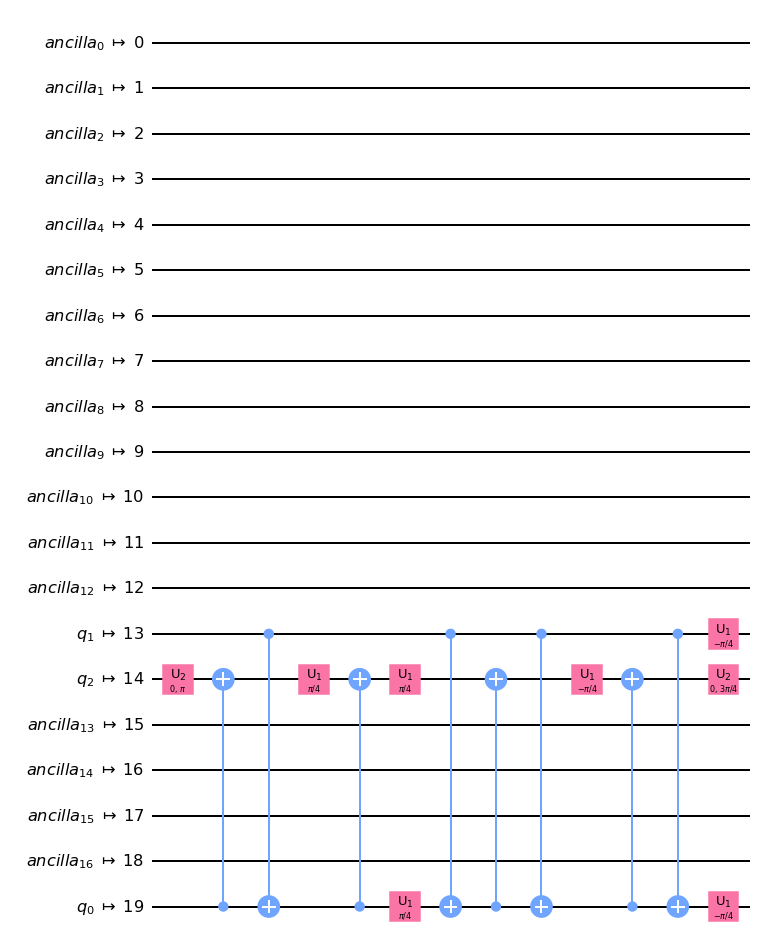

In [19]:
tag = ('00', '00', 'l0', 'p')
circ = QuantumCircuit(3)
circ.append(CCX_Variant_Gate(variant_tag=tag),[0,1,2])
trans_qc = transpile(circ, backend, optimization_level = 3)
trans_qc.draw(output= 'mpl')

initialized variant_tag: ('01', '20', 'f', 's')
look for variant_rules ('01', '20', 'f', 's')


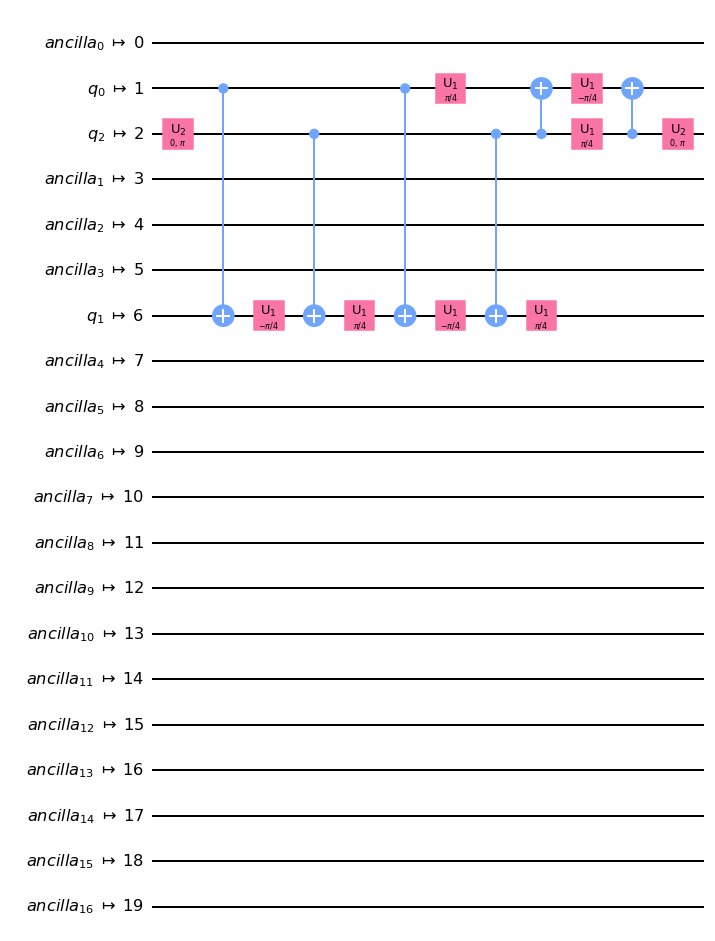

In [20]:
tag = ('01', '20', 'f', 's')
circ = QuantumCircuit(3)
circ.append(CCX_Variant_Gate(variant_tag=tag),[0,1,2])
trans_qc = transpile(circ, backend, optimization_level = 3)
trans_qc.draw(output= 'mpl')

In [21]:
J

NameError: name 'J' is not defined